In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#a

In [3]:
data = pd.read_csv("strongdrink.txt")
data.describe()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,1.926136,13.006534,2.327159,2.367386,19.492045,99.840909,2.298920,2.043352,0.359545,1.597727,5.031761,0.961000,2.623409,748.477273
std,0.771047,0.814431,1.117747,0.275617,3.355821,14.329499,0.627333,0.995579,0.123046,0.571958,2.317965,0.227225,0.705369,316.208737
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.597500,2.210000,17.175000,88.000000,1.747500,1.242500,0.267500,1.250000,3.200000,0.790000,1.990000,500.000000
50%,2.000000,13.050000,1.845000,2.360000,19.500000,98.000000,2.380000,2.155000,0.340000,1.560000,4.640000,0.975000,2.780000,673.500000
75%,3.000000,13.682500,3.047500,2.560000,21.500000,107.250000,2.800000,2.882500,0.430000,1.952500,6.147500,1.120000,3.172500,986.250000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


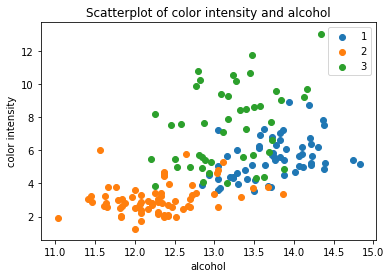

In [4]:
fig, ax = plt.subplots()
for typewine in [1,2,3]:
    data1=data[data["cultivar"]==typewine]
    ax.scatter(data1.alco, data1.color_int,label=typewine)
ax.legend()
plt.xlabel("alcohol")
plt.ylabel("color intensity")
plt.title("Scatterplot of color intensity and alcohol")
plt.show()

In [ ]:
#b

In [5]:
X = data[["alco","malic","tot_phen","color_int"]]
y = data["cultivar"]
clf_mlog = LogisticRegression(solver='newton-cg',multi_class='multinomial').fit(X, y)
param_dist1 = {'penalty': ['l1','l2'],
               'C': sp_uniform(0.1, 10.0)}
random_search1 = RandomizedSearchCV(LogisticRegression().fit(X, y), 
                                    param_distributions=param_dist1,
                                    n_iter=200, n_jobs=-1, cv=5, random_state=25,
                                     scoring='neg_mean_squared_error')
random_search1.fit(X,y)
print('RandBestEstimator1=', random_search1.best_estimator_)
print('RandBestParams1=', random_search1.best_params_)
print('RandBestScore1=', -random_search1.best_score_)

RandBestEstimator1= LogisticRegression(C=2.665871587495725, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
RandBestParams1= {'C': 2.665871587495725, 'penalty': 'l1'}
RandBestScore1= 0.11931818181818182


MSE of the optimal result is 0.119

In [ ]:
#c

In [6]:
rfc = RandomForestRegressor(bootstrap=True,oob_score=True, random_state=25).fit(X, y)
param_dist2 = {'n_estimators':[10,200],
                'max_depth': [2,4],
                'min_samples_split': sp_randint(2, 20),
                'min_samples_leaf': sp_randint(2, 20),
                'max_features': sp_randint(1, 4)}
random_search2 = RandomizedSearchCV(rfc, param_distributions=param_dist2,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')
random_search2.fit(X,y)
print('RandBestEstimator2=', random_search2.best_estimator_)
print('RandBestParams2=', random_search2.best_params_)
print('RandBestScore2=', -random_search2.best_score_)

RandBestEstimator2= RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=True, random_state=25,
           verbose=0, warm_start=False)
RandBestParams2= {'max_depth': 4, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200}
RandBestScore2= 0.2084170237943434


MSE of optimal result is 0.208

In [ ]:
#d

In [7]:
svc= SVC(kernel="rbf", degree=2).fit(X, y)
param_dist3 = {'C':sp_uniform(loc=0.1,scale=10.0),
               'gamma':["scale","auto"],
               'shrinking':[True,False]}
random_search3 = RandomizedSearchCV(svc, param_distributions=param_dist3,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')
random_search3.fit(X,y)
print('RandBestEstimator2=', random_search3.best_estimator_)
print('RandBestParams2=', random_search3.best_params_)
print('RandBestScore2=', -random_search3.best_score_)

RandBestEstimator2= SVC(C=3.3605112613782553, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
RandBestParams2= {'C': 3.3605112613782553, 'gamma': 'scale', 'shrinking': True}
RandBestScore2= 0.14772727272727273


MSE of the optimal result is 0.148

In [ ]:
#e

In [9]:
mlp= MLPClassifier(activation='tanh', solver='lbfgs', alpha=0.1).fit(X, y)
param_dist4 = {'hidden_layer_sizes':sp_randint(1, 100),
               'activation':["logistic", "relu"],
               'alpha': sp_uniform(0.1, 10.0)}
random_search4 = RandomizedSearchCV(mlp, param_distributions=param_dist4,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')
random_search4.fit(X,y)
print('RandBestEstimator2=', random_search4.best_estimator_)
print('RandBestParams2=', random_search4.best_params_)
print('RandBestScore2=', -random_search4.best_score_)

RandBestEstimator2= MLPClassifier(activation='relu', alpha=0.7965389843643799, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=91, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
RandBestParams2= {'activation': 'relu', 'alpha': 0.7965389843643799, 'hidden_layer_sizes': 91}
RandBestScore2= 0.07954545454545454


MSE of optimal result is 0.080

In [ ]:
#f

MLP Classifier is the best predictor of cultivar because it has the lowest cross-validation MSE.